In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
diabetes = pd.read_csv("D:/Dixant/CDAC/Machine Learning/16-12-21/diabetes.csv")

In [3]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes['Insulin']=diabetes['Insulin'].replace(0,np.NaN)
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,np.NaN)
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,np.NaN)
diabetes['BMI']=diabetes['BMI'].replace(0.0,np.NaN)

In [6]:
diabetes['Insulin']=diabetes['Insulin'].replace(np.NaN,diabetes['Insulin'].mean())
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(np.NaN,diabetes['SkinThickness'].mean())
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(np.NaN,diabetes['BloodPressure'].mean())
diabetes['BMI']=diabetes['BMI'].replace(np.NaN,diabetes['BMI'].mean())

In [7]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [8]:
X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1].values

In [9]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=100)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [15]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[83 18]
 [29 24]]
Accuracy: 0.6948051948051948


In [17]:
result2 = classification_report(y_test,y_pred,digits=4)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0     0.7411    0.8218    0.7793       101
           1     0.5714    0.4528    0.5053        53

    accuracy                         0.6948       154
   macro avg     0.6562    0.6373    0.6423       154
weighted avg     0.6827    0.6948    0.6850       154



In [18]:
knn = KNeighborsClassifier()

In [35]:
list2=[]
for i in range(1,200):
    list2.append(i)

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : list2}


In [37]:
gridsearch = GridSearchCV(knn, param_grid)

In [38]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [39]:
gridsearch.best_params_

{'n_neighbors': 56}

In [40]:
gridsearch.best_score_

0.7654671464747435

In [41]:
classifier = KNeighborsClassifier(n_neighbors=56)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=56)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[88 13]
 [25 28]]
Accuracy: 0.7532467532467533


In [60]:
cnt =50
count=[]
train_score =[]
test_score = []
# Will take some time
for i in range(50,60):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 train_score_ = knn.score(X_train,y_train)
 test_score_ = knn.score(X_test,y_test)
 cnt+=1
 count.append(cnt)
 train_score.append(train_score_)
 test_score.append(test_score_)
 
 print("for k = ", cnt)
 print("train_score is : ", train_score_, "and test score is : ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is : ",np.mean(train_score))
print("Average test score is : ", np.mean(test_score))

for k =  51
train_score is :  0.7638436482084691 and test score is :  0.7597402597402597
for k =  52
train_score is :  0.7654723127035831 and test score is :  0.7597402597402597
for k =  53
train_score is :  0.7671009771986971 and test score is :  0.7662337662337663
for k =  54
train_score is :  0.7671009771986971 and test score is :  0.7597402597402597
for k =  55
train_score is :  0.762214983713355 and test score is :  0.7467532467532467
for k =  56
train_score is :  0.7671009771986971 and test score is :  0.7467532467532467
for k =  57
train_score is :  0.7671009771986971 and test score is :  0.7532467532467533
for k =  58
train_score is :  0.7687296416938111 and test score is :  0.7467532467532467
for k =  59
train_score is :  0.7638436482084691 and test score is :  0.7402597402597403
for k =  60
train_score is :  0.7638436482084691 and test score is :  0.7207792207792207
************************************************
************************************************
Average train

Text(0, 0.5, 'Accuracy Rate')

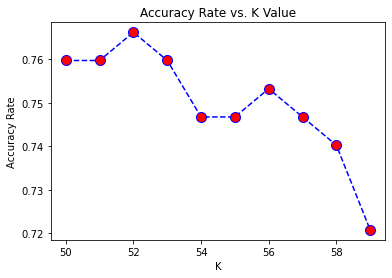

In [61]:
plt.figure()
plt.plot(range(50,60),test_score,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')


In [62]:
classifier = KNeighborsClassifier(n_neighbors=52)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=52)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = accuracy_score(y_test,y_pred)
print("Accuracy:",result1)

Confusion Matrix:
[[89 12]
 [24 29]]
Accuracy: 0.7662337662337663
